First, we need to import the main libraries that we will definitely use later.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.image import imread
import sys, os, shutil
import numpy as np
from tqdm import tqdm

Train and test datasets must be seperated from each other, our is not right now. So let's seperate them. There is one issue that must be mentioned, there were not enough images in files of older ages etc 95,87 so I deleted the files that contain ages above 80. Also the model can be downloaded from kaggle, which is linked here:
https://www.kaggle.com/frabbisw/facial-age

In [2]:

ages = os.listdir("./face_age")
X = []
Y = []
for age in tqdm(ages):
    ageint = int(age)
    new_folder = "./face_age/{0}".format(age)
    photos = os.listdir(new_folder)
    for photo in photos:
        img = imread("{0}/{1}".format(new_folder, photo))
        
        X.append(img)
        Y.append(ageint)




100%|███████████████████████████████████████████████████████| 99/99 [00:20<00:00,  4.78it/s]


We need to create our augmented data which we can easily by the power of tensorflow

In [3]:
from sklearn.model_selection import train_test_split
print(type(X))
X = np.array(X, dtype=np.float16)
Y = np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<class 'list'>


Create our callback class and model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.95):
            self.model.stop_training = True
            
callbacks = myCallback()

Epoch 1/90
245/245 [==============================] - 50s 204ms/step - loss: 669.8611 - mae: 21.3239 - val_loss: 670.2559 - val_mae: 20.3157
Epoch 2/90
245/245 [==============================] - 23s 94ms/step - loss: 550.6848 - mae: 18.8744 - val_loss: 502.3948 - val_mae: 16.8346
Epoch 3/90
245/245 [==============================] - 21s 88ms/step - loss: 458.3939 - mae: 16.6983 - val_loss: 444.3762 - val_mae: 16.4106
Epoch 4/90
245/245 [==============================] - 21s 87ms/step - loss: 382.0176 - mae: 14.9390 - val_loss: 343.7991 - val_mae: 14.7249
Epoch 5/90
245/245 [==============================] - 21s 87ms/step - loss: 326.1472 - mae: 13.4384 - val_loss: 288.6346 - val_mae: 12.0733
Epoch 6/90
245/245 [==============================] - 21s 87ms/step - loss: 265.3648 - mae: 11.8791 - val_loss: 234.9913 - val_mae: 10.9530
Epoch 7/90
245/245 [==============================] - 21s 88ms/step - loss: 213.8280 - mae: 10.5098 - val_loss: 195.4775 - val_mae: 10.2842
Epoch 8/90
245/245 

245/245 [==============================] - 22s 88ms/step - loss: 19.1960 - mae: 3.2298 - val_loss: 118.3027 - val_mae: 7.2209
Epoch 61/90
245/245 [==============================] - 22s 88ms/step - loss: 17.9128 - mae: 3.1166 - val_loss: 102.3087 - val_mae: 6.8581
Epoch 62/90
245/245 [==============================] - 22s 88ms/step - loss: 17.7764 - mae: 3.1197 - val_loss: 112.1604 - val_mae: 7.3895
Epoch 63/90
245/245 [==============================] - 22s 88ms/step - loss: 18.6072 - mae: 3.1824 - val_loss: 102.6776 - val_mae: 6.8838
Epoch 64/90
245/245 [==============================] - 22s 88ms/step - loss: 17.7199 - mae: 3.1164 - val_loss: 98.6740 - val_mae: 6.7204
Epoch 65/90
245/245 [==============================] - 22s 89ms/step - loss: 15.8975 - mae: 2.9510 - val_loss: 96.1550 - val_mae: 6.8454
Epoch 66/90
245/245 [==============================] - 22s 88ms/step - loss: 15.3244 - mae: 2.9080 - val_loss: 98.8313 - val_mae: 6.7699
Epoch 67/90
245/245 [============================

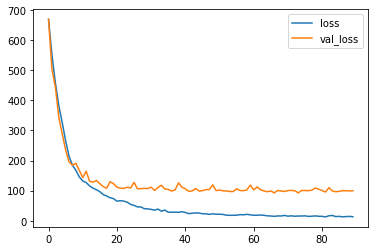

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=90)


plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label='val_loss')
plt.legend()



Let's save our model so we don't need to train it again and again

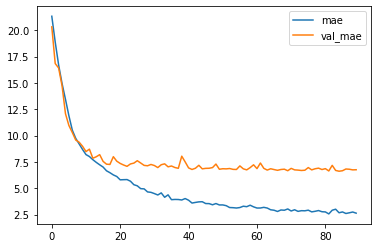

In [21]:
plt.plot(r.history["mae"], label="mae")
plt.plot(r.history["val_mae"], label="val_mae")
plt.legend()

In [26]:
model.save_weights('my_weights')
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


Our model just works fine, let's test it. I tested the model with a photo of a pretty girl, who is 19.

In [24]:
test_img = imread("yas.png", 0) / 255
print(type(test_img))
test_img = tf.expand_dims(test_img, 0)
print(test_img.shape)



<class 'numpy.ndarray'>
(1, 200, 200, 3)


Model says she's only 16, seems she looks younger than she is lol

In [25]:
p = model.predict(test_img)
score = tf.nn.softmax(p[0])
print(str(int(np.round(p)[0][0])-3) + " - " + str(int(np.round(p)[0][0])+3))


4 - 10
